# Import modules

In [70]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score


# Exploratory Data Analysis

In [71]:
"""
Loading the dataset:

Variables:
- PassengerId: a number that identifies each passenger
- Name: the full name of a passenger
- Sex
- Age
- Pclass: the class in which the passenger was traveling: first, second, or third
- SibSp: the number of siblings and spouse of the passenger (0 if the passenger is traveling alone)
- Parch: the number of parents and children of the passenger (0 if the passenger is traveling alone)
- Ticket: ticket number
- Fare: the fare the passenger paid in British pounds
- Cabin: the cabin in which the passenger was traveling
- Embarked: the port in which the passenger embarked: "C" for Cherbourg, "Q" for Queenstown, "S" for Southampton
- Survived
"""

# Loading the dataset

path_currDir = os.getcwd()
path_dataset = os.path.join( path_currDir, 'datasets', 'raw', 'titanic_dataset.csv' )

df_raw = pd.read_csv(path_dataset)
df_raw.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
# All variables

print(f"The dataset has {len(df_raw)} rows and {len(df_raw.columns)} variables")

The dataset has 891 rows and 12 variables


(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


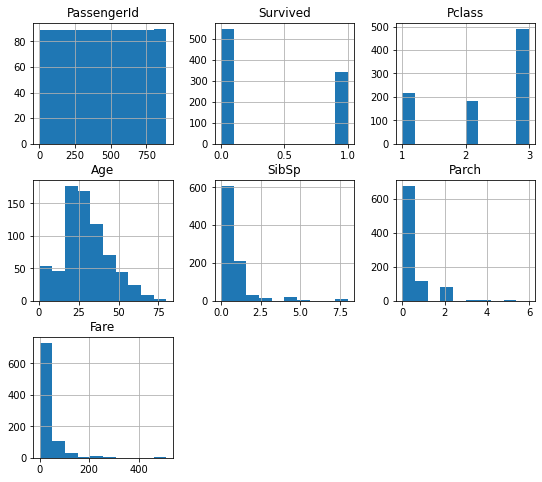

In [72]:
# Numerical continuous variables
print(df_raw.shape)

df_raw.hist(figsize=(9,8));
df_raw.describe()


In [73]:
# Categorical variables
print('Sex counts:')
print( df_raw['Sex'].value_counts() )

print('Embarked counts:')
print( df_raw['Embarked'].value_counts() )

Sex counts:
male      577
female    314
Name: Sex, dtype: int64
Embarked counts:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


The dataset has 891 rows
Columns (features of the dataset):
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
342 passengers survived out of 891


Text(0.5, 1.0, 'Survived (1) vs deceased (0)')

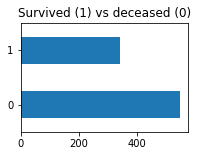

In [74]:
# exploring the dataset
print("The dataset has", len(df_raw), "rows")
print("Columns (features of the dataset):")
print(list(df_raw.columns))
print(sum(df_raw['Survived']),'passengers survived out of',len(df_raw))


df_raw['Survived'].value_counts().plot(kind='barh', figsize=(3,2))
plt.title('Survived (1) vs deceased (0)')

# Data Cleaning

In [75]:
# cleaning up the data
df_clean_0 = df_raw.copy(deep=True)

# Check out how many columns have missing values
print(f"Missing values per feature: \n{df_clean_0.isna().sum()}")
# It seems that the "cabin" feature has too many missing values
# so let's drop "cabin"
clean_data = df_clean_0.drop('Cabin', axis=1)
print('-'*50)

# For the "Age" column, let's fill in the missing values with the median of all ages
median_age = df_clean_0['Age'].median()
clean_data['Age'] = clean_data['Age'].fillna(median_age)
# for Embarked column, let's make a new category "U" - for unknown port of embarkment
clean_data['Embarked'] = clean_data['Embarked'].fillna('U')
print('Missing values post-processing:')
print(clean_data.isna().sum())
clean_data.head()

Missing values per feature: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
Missing values post-processing:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [76]:
df_clean_0.to_csv('datasets/data-clean.csv', index=False)

# Data preprocessing

For preprocessing, we can manipulate the features in the following ways:
- One-hot encoding;
- Binning;
- Feature selection;

In [77]:
# Let create a copy for preprocessing
df_preproc_0 = df_clean_0.copy(deep=True)


In [78]:
"""
Let's start with the features selection. 
Some features are unique for each passenger, 
such as passengerId, Name, and Ticket; therefore, let's delete them:
"""
df_preproc_0.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)
df_preproc_0.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [79]:
"""
One-hot encoding
The best strategy to deal with the categorical data is to hot-encode it. 
In our case, these are features "Sex" and "Embarked":
"""
gender_columns = pd.get_dummies(df_preproc_0['Sex'], prefix='Sex')
embarked_columns = pd.get_dummies(df_preproc_0["Embarked"], prefix="Embarked")
# Concatenate the hot-encoded columns with the original dataframe
df_preproc_0 = pd.concat([df_preproc_0, gender_columns], axis=1)
df_preproc_0 = pd.concat([df_preproc_0, embarked_columns], axis=1)
df_preproc_0 = df_preproc_0.drop(['Sex', 'Embarked'], axis=1)
df_preproc_0.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [80]:
"""
We can also hot-encode the numerical feature some numerical features, 
such as Pclass. 
Nevertheless, let's start with seeing if with higher class, 
there is increased survivability chance:
"""
class_survived = df_preproc_0[['Pclass', 'Survived']]

first_class = class_survived[class_survived['Pclass'] == 1]
second_class = class_survived[class_survived['Pclass'] == 2]
third_class = class_survived[class_survived['Pclass'] == 3]

print(f"In the first class,  {sum(first_class['Survived'])/len(first_class)*100  :.0f}% of passengers survived. ")
print(f"In the second class, {sum(second_class['Survived'])/len(second_class)*100:.0f}% of passengers survived. ")
print(f"In the third class,  {sum(third_class['Survived'])/len(third_class)*100  :.0f}% of passengers survived. ")

"""
There does seem to be a trend of increasing survivability 
with the increasing class,
therefore, I decide to leave it as is, without hot-encoding this feature.
""";


In the first class,  63% of passengers survived. 
In the second class, 47% of passengers survived. 
In the third class,  24% of passengers survived. 


In [81]:
"""
Now let's do some binning - turning numerical data into categorical data. 
We usually do this in features with lots of unknown values; 
in our cases, in the feature "Age" we handled a lot of missing values, 
therefore, let's bin the age into categories:
"""
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(df_preproc_0['Age'], bins)
df_preproc_0['Categorized_age'] = categorized_age
df_preproc_0.drop(["Age"], axis=1, inplace=True)
cagegorized_age_columns = pd.get_dummies(df_preproc_0['Categorized_age'], prefix='Categorized_age')
df_preproc_0 = pd.concat([df_preproc_0, cagegorized_age_columns], axis=1)
df_preproc_0 = df_preproc_0.drop(['Categorized_age'], axis=1)
df_preproc_0.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,3,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,1,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,0,0,0
3,1,1,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,3,0,0,8.0500,0,1,0,0,1,0,0,0,1,0,0,0,0


In [82]:
"""
Let's normalize "Fare" by log
"""
print(df_preproc_0['Fare'].min())
df_preproc_0['Fare'].replace(0, 0.1, inplace=True)
print(df_preproc_0['Fare'].min())
df_preproc_0['Fare'] = np.log10(df_preproc_0['Fare'])
df_preproc_0

0.0
0.1


,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,3,1,0,0.860338,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,1,1,0,1.852988,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,3,0,0,0.898999,1,0,0,0,1,0,0,1,0,0,0,0,0
3,1,1,1,0,1.725095,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,3,0,0,0.905796,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1.113943,0,1,0,0,1,0,0,1,0,0,0,0,0
887,1,1,0,0,1.477121,1,0,0,0,1,0,1,0,0,0,0,0,0
888,0,3,1,2,1.370143,1,0,0,0,1,0,0,0,0,0,0,0,0
889,1,1,0,0,1.477121,0,1,1,0,0,0,0,1,0,0,0,0,0


In [83]:
"""
The dataset is cleaned and preprocessed, now we can save it as a file by
using the command below
"""

currDir = os.getcwd()
datasetsFile = os.path.join( currDir, 'datasets', 'data-preproc.csv' )

df_preproc_0.to_csv(datasetsFile, index=None)

# Training the model

We'll train the following models:
- Logistic regression (perceptron)
- Decision tree
- Naive Bayes
- SVM
- random forest
- gradient boosted tree
- AdaBoost model

In [84]:
data = df_preproc_0.copy(deep=True)

# Features-labels split and train-validation split
# Features - all the columns except "Survived"
features = data.drop(['Survived'], axis=1)
labels = data['Survived']

print(features.columns)
print(labels.shape)

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Categorized_age_(0, 10]',
       'Categorized_age_(10, 20]', 'Categorized_age_(20, 30]',
       'Categorized_age_(30, 40]', 'Categorized_age_(40, 50]',
       'Categorized_age_(50, 60]', 'Categorized_age_(60, 70]',
       'Categorized_age_(70, 80]'],
      dtype='object')
(891,)


In [85]:

# Split the data into test-train-validation sets: 60-20-20%
## First split the data into two groups: one with train data, the other - with mixed test and validate
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
	features, labels, test_size=0.4, 
	random_state=100 # We fix random_state to make sure we get the same split every time
)
## Now, split the test-validate group into the separate test and validate groups
features_validation, features_test, labels_validation, labels_test = train_test_split(
	features_validation_test, labels_validation_test, test_size=0.5, random_state=100
)
print(f"For training, we will use {len(features_train)} features and {len(labels_train)} labels.")
print(f"For validation, we will use {len(features_validation)} features and {len(labels_validation)} labels.")
print(f"For testing, we will use {len(features_test)} features and {len(labels_test)} labels.")

For training, we will use 534 features and 534 labels.
For validation, we will use 178 features and 178 labels.
For testing, we will use 179 features and 179 labels.


In [86]:
lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)

nb_model = GaussianNB()
nb_model.fit(features_train, labels_train)

svm_model = SVC()
svm_model.fit(features_train, labels_train)

rf_model = RandomForestClassifier()
rf_model.fit(features_train, labels_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(features_train, labels_train)

ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train)


AdaBoostClassifier()

In [87]:
"""
Evaluating the models,
metric - accuracy

The model with the highest accuracy (81%) seems to be gradient boosting
"""
accuracy_scores = {}
models = [lr_model, dt_model, nb_model, svm_model, rf_model, gb_model, ab_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random forest', 'Gradient Boosting', 'AdaBoost']

for i,j in zip( models, model_names ):
	accuracy_scores[j] = i.score(features_validation, labels_validation)

# Sort the dictionary based on value
accuracy_scores2 = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

print('Accuracies (high -> low): ')
for i in accuracy_scores2:
	print(f" - {i}: {accuracy_scores2[i]:.2f}")


Accuracies (high -> low): 
 - SVM: 0.80
 - Gradient Boosting: 0.79
 - AdaBoost: 0.78
 - Decision Tree: 0.77
 - Logistic Regression: 0.76
 - Random forest: 0.76
 - Naive Bayes: 0.43


In [88]:
"""
Evaluating the models,
metric - F1 score

The highest score here is, once again, that of gradient boosting
(F1 score = 0.74)
"""
# metric = F1 score

f1_scores = {}
models = [lr_model, dt_model, nb_model, svm_model, rf_model, gb_model, ab_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random forest', 'Gradient Boosting', 'AdaBoost']

for i,j in zip( models, model_names ):
	predicted_labels = i.predict(features_validation)
	f1_scores[j] = f1_score(labels_validation, predicted_labels)

# Sort the dictionary based on value
f1_scores2 = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

print('F1 score values (high -> low): ')
for i in f1_scores2:
	print(f" - {i}: {f1_scores2[i]:.2f}")



F1 score values (high -> low): 
 - SVM: 0.71
 - Gradient Boosting: 0.70
 - AdaBoost: 0.70
 - Logistic Regression: 0.68
 - Decision Tree: 0.68
 - Random forest: 0.68
 - Naive Bayes: 0.57


# Finetuning

Above we did the training with the default hyperparameters.

Now let's finetune them by a Grid search. Let's choose Gradient Boosting for the grid search

In [89]:
features_trainValidation = pd.concat([features_train, features_validation], ignore_index=True)
print(features_trainValidation.shape)

labels_trainValidation = pd.concat([labels_train, labels_validation], axis='rows')
print(labels_trainValidation.shape)

(712, 17)
(712,)


In [90]:
grid_search_parameters = {
# 	'loss': ['log_loss'],
	'min_samples_split': [2,5,8,11],
	'min_samples_leaf': [1,4,7,9],
	'max_depth': [1,2,3,4], 
	'learning_rate': [0.1, 0.5, 1],
	'n_estimators': [1, 40, 80, 120]
}

gb_grid = GradientBoostingClassifier()
gb_grid2 = GridSearchCV(estimator = gb_grid, param_grid = grid_search_parameters)
gb_grid2.fit(features_trainValidation, labels_trainValidation)
# gb_grid2.fit(features_train, labels_train)

gb_winner = gb_grid2.best_estimator_
print(gb_winner)
# accuracy on basically train+validation set
print(gb_winner.score(features_trainValidation, labels_trainValidation))


GradientBoostingClassifier(learning_rate=0.5, max_depth=2, min_samples_leaf=4,
                           min_samples_split=11, n_estimators=80)
0.901685393258427


# Test

Now let's test our chosen model on the test dataset:

In [91]:
predictions = gb_winner.predict( features_test )
print(f"Accuracy of the final model on the testing data: {accuracy_score( labels_test, predictions ):.3f}")


Accuracy of the final model on the testing data: 0.860


# Save model

In [92]:
pickle.dump(gb_winner, open('models/ML_model_Titanic.sav', 'wb'))
